# Guided Project: Predicting Car Prices

In this course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
        'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 
        'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


The normalized-losses column contains missing values represented using ?. Let use DataFrame.replace method to replace all of the ? values with the numpy.nan missing value. Before replacing, we need to convert it to int or float.

In [4]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Check the dtype and missing values
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [6]:
# Convert all columns to float type
numeric_cars = numeric_cars.astype('float')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [7]:
# Check missing values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
# Replace the missing values with mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
# Check for missing value again
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def knn_train_test(train_col, target_col, dataframe):
    np.random.seed(1)
    temp_df = dataframe.copy()
    X = temp_df[[train_col]]
    y = temp_df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    rmse = mse ** (1/2)
    
#     print("Mse is {} and Rmse is {}".format(mse, rmse))
    return rmse

In [11]:
# First test columns 
train_cols = numeric_cars.columns.tolist()
train_cols.remove('price')
target_col = 'price'
# knn_train_test(train_cols, target_col, numeric_cars)
rmse_results = {}
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4449.835618
highway-mpg          5127.664925
curb-weight          5264.785697
city-mpg             5367.090849
width                5524.967407
length               6553.685189
wheel-base           7025.843991
compression-rate     7180.785815
bore                 7767.024925
stroke               8582.895046
peak-rpm             8885.470102
normalized-losses    9669.794699
height               9794.610745
dtype: float64

### Including k folds & plot in a graph

In [12]:
def knn_train_test(train_col, target_col, dataframe):
    np.random.seed(1)
    temp_df = dataframe.copy()
    X = temp_df[[train_col]]
    y = temp_df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0)
    
    hyper_params = [1, 3, 5, 7, 9]
    hyp_rmse = dict()
    
    for k in hyper_params:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
        mse = mean_squared_error(y_test, prediction)
        rmse = mse ** (1/2)
        hyp_rmse[k] = rmse
        
    return hyp_rmse

In [13]:
k_rmse_results = {}
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 9097.770506892248,
  3: 7285.738458422152,
  5: 7767.024925221986,
  7: 8165.01609225081,
  9: 8417.9868715447},
 'city-mpg': {1: 5456.392795000496,
  3: 5876.870376540388,
  5: 5367.090848612021,
  7: 5348.877973840085,
  9: 5470.73735066944},
 'compression-rate': {1: 8514.988784490559,
  3: 6886.895087449334,
  5: 7180.7858147185225,
  7: 7489.422071240509,
  9: 7339.288781810074},
 'curb-weight': {1: 6519.536253506404,
  3: 5421.626297545751,
  5: 5264.785697070531,
  7: 5028.8031202592265,
  9: 5192.694632799406},
 'height': {1: 11953.372302080985,
  3: 9755.784118617179,
  5: 9794.610745290734,
  7: 9708.583122005743,
  9: 9922.816160889897},
 'highway-mpg': {1: 6528.5587650736215,
  3: 5818.414932130579,
  5: 5127.664924508934,
  7: 5008.334018878719,
  9: 5267.431076665544},
 'horsepower': {1: 4652.412039395665,
  3: 3886.7972945794745,
  5: 4449.835617849535,
  7: 4989.809532884976,
  9: 5578.411416152676},
 'length': {1: 6978.938616701416,
  3: 6473.24783419234,
 

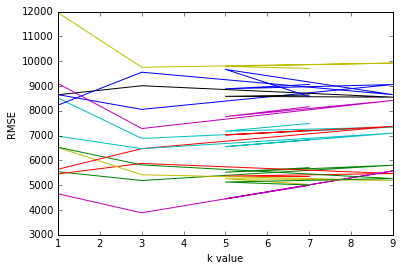

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [15]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower            4711.453180
curb-weight           5485.489200
city-mpg              5503.993869
highway-mpg           5550.080743
width                 5553.885020
wheel-base            6745.807112
length                6786.980974
compression-rate      7482.276108
bore                  8146.707371
stroke                8685.442129
peak-rpm              8742.416001
normalized-losses     8936.470889
height               10227.033290
dtype: float64

In [16]:
feature_tolist = sorted(feature_avg_rmse, key=feature_avg_rmse.get)

In [17]:
def knn_train_test(train_col, target_col, dataframe):
    temp_df = dataframe.copy()
    X = temp_df[train_col]
    y = temp_df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    rmse = mse ** (1/2)
    
    print("Rmse is {} of {}\n".format(rmse, train_col))

In [18]:
best_features = [feature_tolist[:2], feature_tolist[:3],
                 feature_tolist[:4], feature_tolist[:5]]
for feature in best_features:
    knn_train_test(feature, 'price', numeric_cars)

Rmse is 3850.9912804825904 of ['horsepower', 'curb-weight']

Rmse is 3668.557211509403 of ['horsepower', 'curb-weight', 'city-mpg']

Rmse is 4136.991214330891 of ['horsepower', 'curb-weight', 'city-mpg', 'highway-mpg']

Rmse is 3428.38340261035 of ['horsepower', 'curb-weight', 'city-mpg', 'highway-mpg', 'width']



### Multivaraite Model

In [19]:
def knn_train_test(train_col, target_col, dataframe):
    np.random.seed(1)
    temp_df = dataframe.copy()
    X = temp_df[train_col]
    y = temp_df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0)
    
    hyper_params = [i for i in range(1, 25)]
    hyp_rmse = dict()
    
    for k in hyper_params:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
        mse = mean_squared_error(y_test, prediction)
        rmse = mse ** (1/2)
        hyp_rmse[k] = rmse
        
    return hyp_rmse

In [20]:
# Top 3 models with hyperparameter value from 1 to 25
k_1_to_25_rmse = knn_train_test(feature_tolist[:3], 'price', numeric_cars)

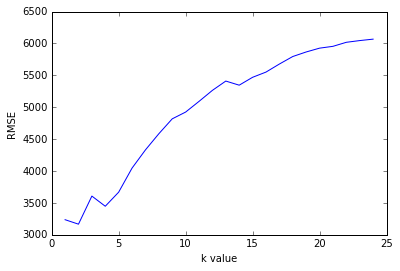

In [21]:
x, y = zip(*k_1_to_25_rmse.items())    
plt.plot(x,y)
plt.xlabel('k value')
plt.ylabel('RMSE')